In [88]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.linalg as LA
from scipy.optimize import curve_fit

I firstly create a program to fill the grid with entries successively, modelling playing the game assuming neither my friend nor I have an optimal strategy. I test this with a 3 by 3 grid.

In [89]:
def populate(n):
    vars=np.zeros(n*n**2)
    Grid=np.zeros((n,n))
    for i in range (n**2):
        var1=random.randint(0,n-1)
        var2=random.randint(0,n-1)
        while(vars[(n+1)*var1+var2]==1):
             var1=random.randint(0,n-1)
             var2=random.randint(0,n-1)
        vars[(n+1)*var1+var2]=1 
        if (i%2==0):
            Grid[var1][var2]=0
        else: 
            Grid[var1][var2]=1
    return Grid

n=3 
Grid=populate(3)
print(Grid)
print("Determinant: " ,LA.det(Grid))

[[0. 0. 1.]
 [0. 1. 1.]
 [0. 1. 0.]]
Determinant:  0.0


Now I consider different values of n and run through my program 1000 for all of these n successively. The array 'results' stores my percentage success rate for each value of n for these 1000 trials. I then create a scatter plot showing my results to deduce if there is some pattern. 

The results are:  [67.  72.1 58.4 58.4 51.5 48.  39.  34.3 25.4 19.3 11.9  5.8  2.1  1.1
  0.9  0.4  0.1  0.   0.   0.   0.   0.   0.1  0. ]


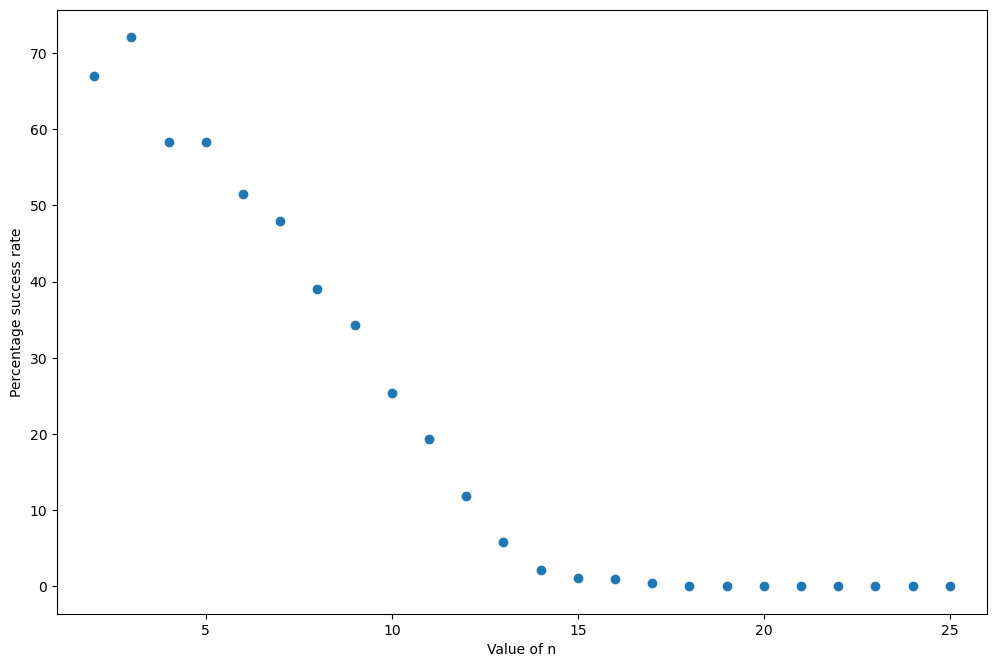

<Figure size 432x288 with 0 Axes>

In [90]:
results=np.zeros(24)
xs=np.zeros(24)
for n in range(2, 26):
    no_0=0
    for i in range(1000):
        Grid=populate(n)
        A=LA.det(Grid)
        if(A==0):
            no_0=no_0+1
    xs[n-2]=n
    results[n-2]=(no_0/1000)*100

print("The results are: " ,results)
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.xlabel("Value of n")
plt.ylabel("Percentage success rate")
plt.xlim(1,26)
plt.scatter(xs, results)
plt.show()
plt.savefig("Plot 1")




My results show that I am less likely to win with larger n, as I expect. I think there must be a polynomial relationship between n and my probability of winning based on the pattern we see here. 

Next, I repeat the analysis assuming my friend starts first. This just involves changing on which of the odd or even plays of the game a 0 or 1 is added to the grid. 

In [91]:
def populate(n):
    vars=np.zeros(n*n**2)
    Grid=np.zeros((n,n))
    for i in range (n**2):
        var1=random.randint(0,n-1)
        var2=random.randint(0,n-1)
        while(vars[(n+1)*var1+var2]==1):
             var1=random.randint(0,n-1)
             var2=random.randint(0,n-1)
        vars[(n+1)*var1+var2]=1   
        if (i%2==0):
            Grid[var1][var2]=1
        else: 
            Grid[var1][var2]=0
    
    return Grid

I again plot my results for my success rate with nxn grids for n ranging from 2 to 25. 

The results are:  [66.4 43.2 60.  54.7 53.1 47.7 42.4 32.1 28.2 17.3 11.   5.4  2.7  1.6
  0.6  0.4  0.2  0.   0.   0.2  0.   0.   0.   0. ]


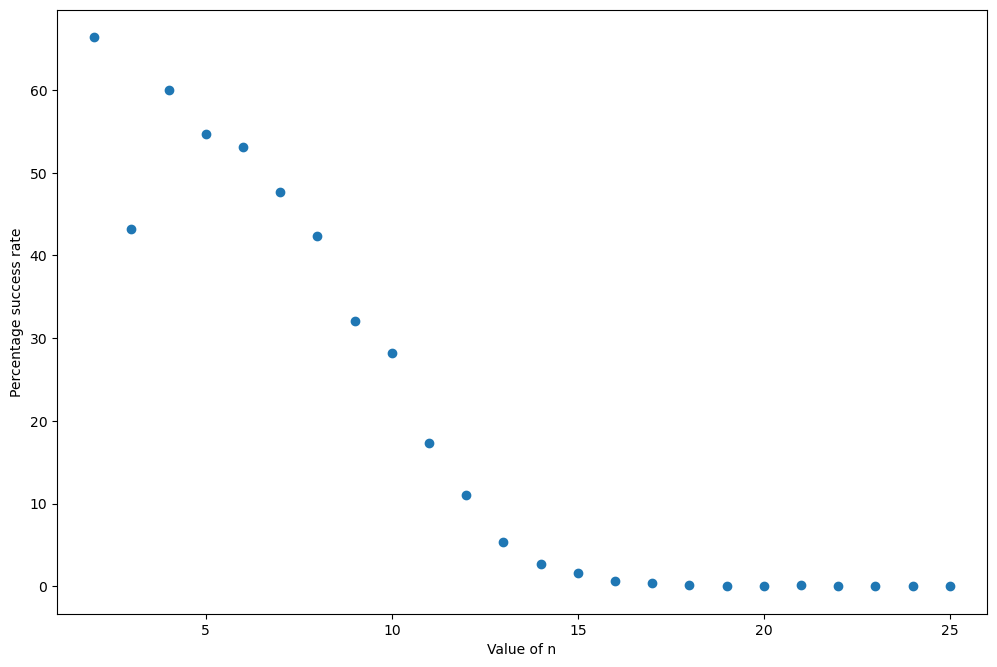

<Figure size 432x288 with 0 Axes>

In [92]:

for n in range(2, 26):
    no_0=0
    for i in range(1000):
        Grid=populate(n)
        A=LA.det(Grid)
        if(A==0):
            no_0=no_0+1
    xs[n-2]=n
    results[n-2]=(no_0/1000)*100

print("The results are: " ,results)
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.xlabel("Value of n")
plt.ylabel("Percentage success rate")
plt.xlim(1,26)
plt.scatter(xs,results)
plt.show()
plt.savefig("Plot 2")

I update my code so that we can play the game with strategy rather than at random.

In [93]:

def populate(n):
    vars=np.zeros(n*n**2)
    Grid=np.zeros((n,n))
    for i in range(n**2):
        if (i%2==0):
            var1=int(input('Your turn: Row number?'))
            var2=int(input('Your turn: Column number?'))
            while(vars[(n+1)*var1+var2]==1):
                var1=int(input('Your turn: Row number?'))
                var2=int(input('Your turn: Column number?'))
            vars[(n+1)*var1+var2]=1    
            Grid[var1][var2]=0 
        else: 
           var1=random.randint(0,n-1)
           var2=random.randint(0,n-1)
           while(vars[(n+1)*var1+var2]==1):
               var1=random.randint(0,n-1)
               var2=random.randint(0,n-1)   
           vars[(n+1)*var1+var2]=1  
           Grid[var1][var2]=1
    return Grid




I test my updated code for small n- two and 3, and output my results for 1 trial of the game with each n. 

In [94]:
xs=np.zeros(2)
results=np.zeros(2)

for n in range(2, 4):
    no_0=0
    for i in range(1):
        Grid=populate(n)
        A=LA.det(Grid)
        if(A==0):
            no_0=no_0+1
    xs[n-2]=n
    results[n-2]=(A)

print("Determinant for n=2: " ,results[0])
print("Determinant for n=3: " ,results[1])

Determinant for n=2:  0.0
Determinant for n=3:  0.0
